In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)

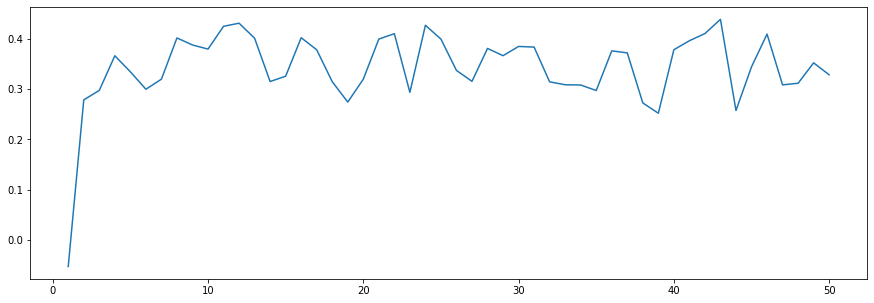

In [31]:
# поищем максимальную глубину дерева решений

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from pylab import rcParams 
rcParams['figure.figsize'] = 15, 5 

m = []
n = []

for i in range(50):
    m.append(i+1)
    n.append(cross_val_score(DecisionTreeRegressor(max_depth = i+1), X, y, cv=3).mean())
    
plt.plot(m,n)

In [22]:
%%time
# попробуем подобрать лучшие параметры для разных регрессоров
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

treeparams = {"max_features": list(range(1,30)),
              "max_depth": list(range(1,30))}

lrparams = {"max_features": list(range(1,30)),
              "max_depth": list(range(1,30))}

clfrf = RandomizedSearchCV(rf, treeparams, random_state=0, n_iter=30)
clfdt = RandomizedSearchCV(dt, treeparams, random_state=0, n_iter=30)
search = clfrf.fit(X_train, y_train)
print('RandomForestRegressor', search.best_params_, search.best_score_)
search = clfdt.fit(X_train, y_train)
print('DecisionTreeRegressor', search.best_params_, search.best_score_)

RandomForestRegressor {'max_features': 6, 'max_depth': 23} 0.8468561828496457
DecisionTreeRegressor {'max_features': 8, 'max_depth': 8} 0.7633880528897168
Wall time: 25.9 s


In [25]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [26]:
search_space = [
    hp.choice(label='max_features', options=list(range(1,30))),
    hp.choice(label='max_depth', options=list(range(1,30))),
    hp.choice(label='min_samples_leaf', options=list(range(1,30))),           
]

In [29]:
from hyperopt.pyll.stochastic import sample


samples = []

# Sample 10000 values from the range
for _ in range(10):
    print(sample(search_space))

(12, 11, 21)
(15, 15, 9)
(2, 10, 28)
(18, 11, 16)
(3, 20, 27)
(22, 15, 10)
(2, 14, 4)
(3, 9, 25)
(18, 16, 4)
(19, 25, 1)


In [32]:
def objective(params):
  rf = RandomForestRegressor(max_features=params[0], max_depth=params[1], min_samples_leaf=params[2])
  scores = cross_val_score(rf, X, y, cv=10)
  return -scores.mean()

In [33]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [34]:
from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [35]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=search_space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=25)

print(tpe_best)

100%|███████████████████████████████████████████████| 25/25 [00:30<00:00,  1.20s/trial, best loss: -0.5629293538834178]
{'max_depth': 16, 'max_features': 7, 'min_samples_leaf': 2}


In [36]:
# Run 2000 evals with the random algorithm
rand_best = fmin(fn=objective, space=search_space, algo=rand_algo, trials=rand_trials, 
                 max_evals=25, rstate= np.random.RandomState(50))

print(rand_best)

100%|███████████████████████████████████████████████| 25/25 [00:26<00:00,  1.07s/trial, best loss: -0.5168419128263932]
{'max_depth': 26, 'max_features': 4, 'min_samples_leaf': 9}
